In [1]:
from torch.utils.data import DataLoader
from model import Model

from preprocess import ProcessGoEmotions, TokenizeDataset

/Users/cha/opt/anaconda3/envs/anlp/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PATH1 = "./data/full_dataset/goemotions_1.csv"
PATH2 = "./data/full_dataset/goemotions_2.csv"
PATH3 = "./data/full_dataset/goemotions_3.csv"

## With general emotions

----

In [3]:
LABEL = "emotion_category" # positive negative ambiguous and neutral
plot_mapping = {0: "neutral", 1: "ambiguous", 2: "negative", 3: "positive"}

----

In [4]:
process = ProcessGoEmotions(label_choice=LABEL)
train_dataset, test_dataset = process.get_datasets(paths=[PATH1], test_size = 0.2)

df = process.df
print(len(df))
df.head(3)

70000


,text,label
0,That game hurt.,2
1,>sexuality shouldn’t be a grouping category I...,3
2,"You do right, if you don't care then fuck 'em!",1


<Axes: ylabel='label'>

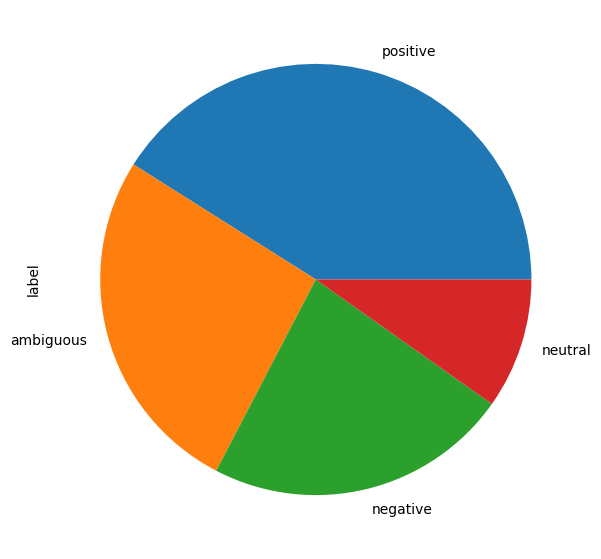

In [5]:
df['label'] = df['label'].map(plot_mapping)
df_class_count = df["label"].value_counts()
df_class_count.plot.pie(y="text", figsize=(10,7))

<Axes: >

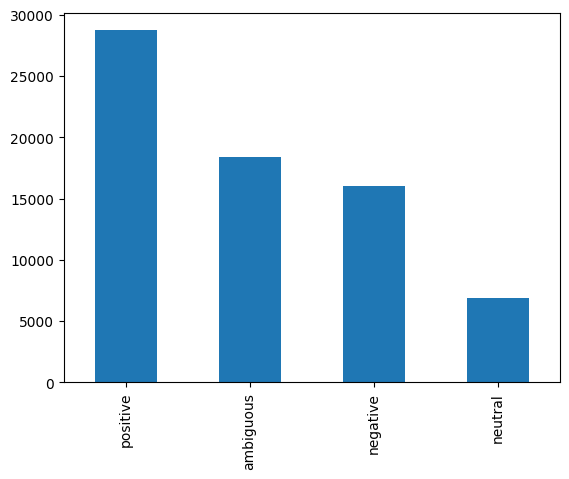

In [6]:
df_class_count.plot(kind='bar')

## With all the emotions

----

In [7]:
LABEL = "emotions"

-----

In [8]:
process = ProcessGoEmotions(label_choice=LABEL)
train_dataset, test_dataset = process.get_datasets(paths=[PATH1], test_size = 0.2)

df = process.df
print(len(df))
df.head(3)

70000


,text,label
0,That game hurt.,22
1,>sexuality shouldn’t be a grouping category I...,0
2,"You do right, if you don't care then fuck 'em!",27


In [9]:
_, mapping, _ = process.get_mapping()

plot_mapping = {v: k for k, v in mapping.items()}

['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', 'anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness', 'confusion', 'curiosity', 'realization', 'surprise', 'neutral']


<Axes: ylabel='label'>

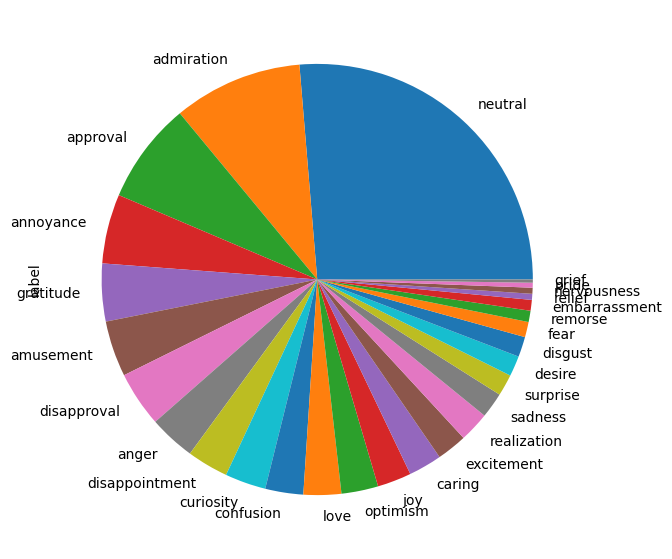

In [10]:
labels, _, _ = process.get_mapping()
print(labels)

df['label'] = df['label'].map(plot_mapping)
df_class_count = df["label"].value_counts()
df_class_count.plot.pie(y="text", figsize=(10,7))

<Axes: >

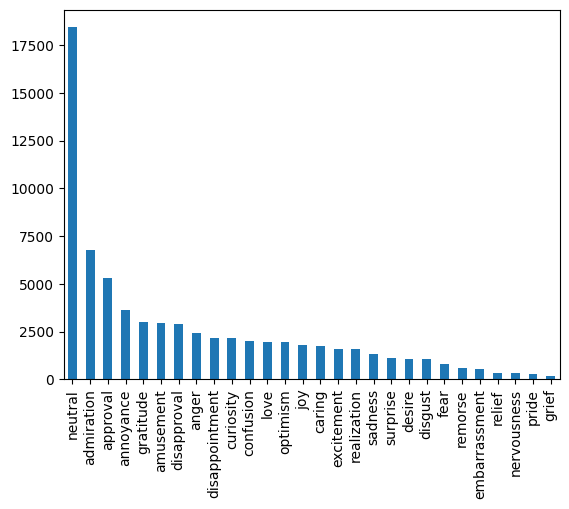

In [11]:
df_class_count.plot(kind='bar')